# **Downloading Kaggle data sets directly into Colab**

In [ ]:
pip install kaggle


## mount the google drive so you can store your kaggle API credentials for future use

In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [2]:
mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
cp /content/content/MyDrive/content/kaggle.json ~/.kaggle/kaggle.json


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [1]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d sukhmandeepsinghbrar/housing-price-dataset


  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 93.7MB/s]


In [ ]:
!unzip housing-price-dataset.zip


Archive:  housing-price-dataset.zip
  inflating: Housing.csv             




   # Objective: Analyze property values to understand housing market trends and predict property prices based on various features.

# Import necessary libraries


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [ ]:
df = pd.read_csv('/content/Housing.csv')
pd.set_option('display.max_columns', None)

# Display the first and the last few rows of the dataset

In [ ]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357



# Check for missing values

In [ ]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Check for duplicates

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0



# Convert data types

In [ ]:
df['price'] = df['price'].astype(float)

# Data overview after cleaning

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Visualize data distributions

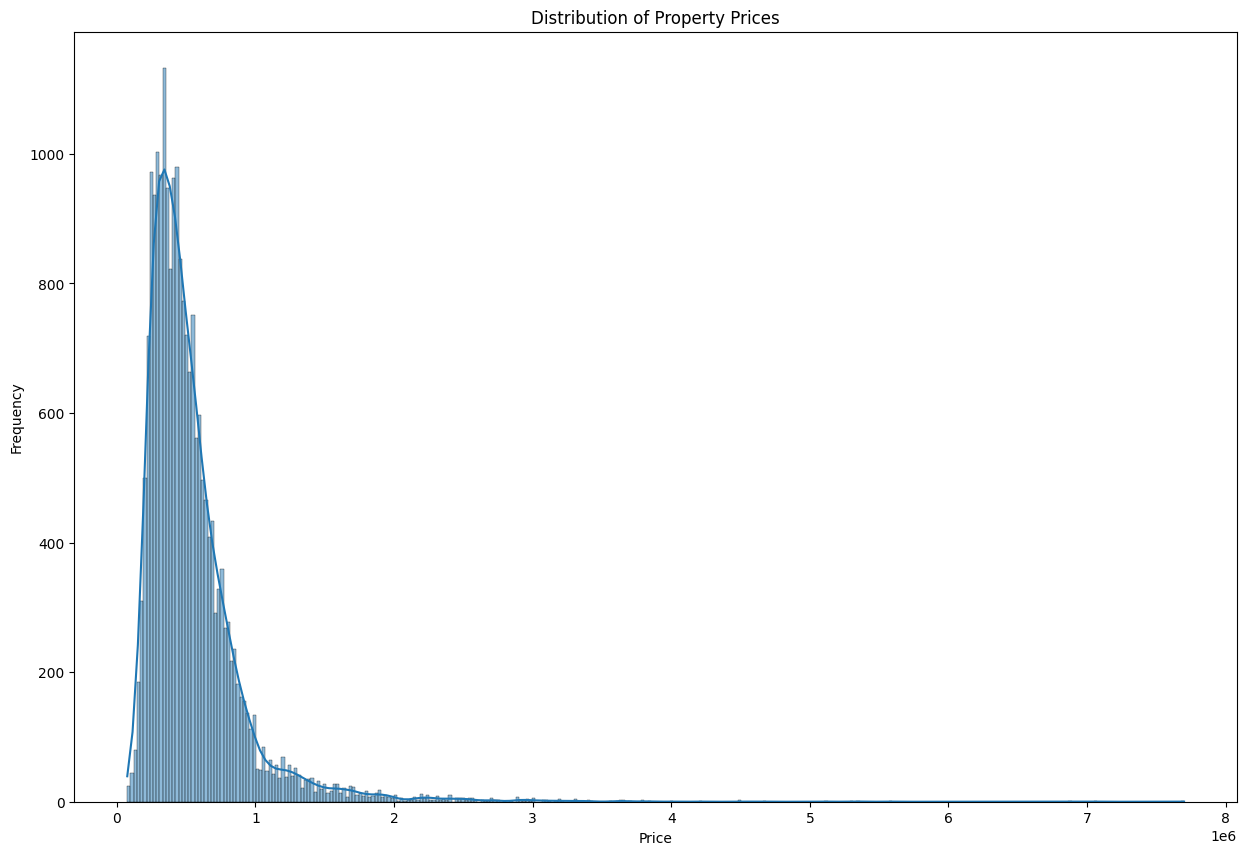

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize outliers using box plots

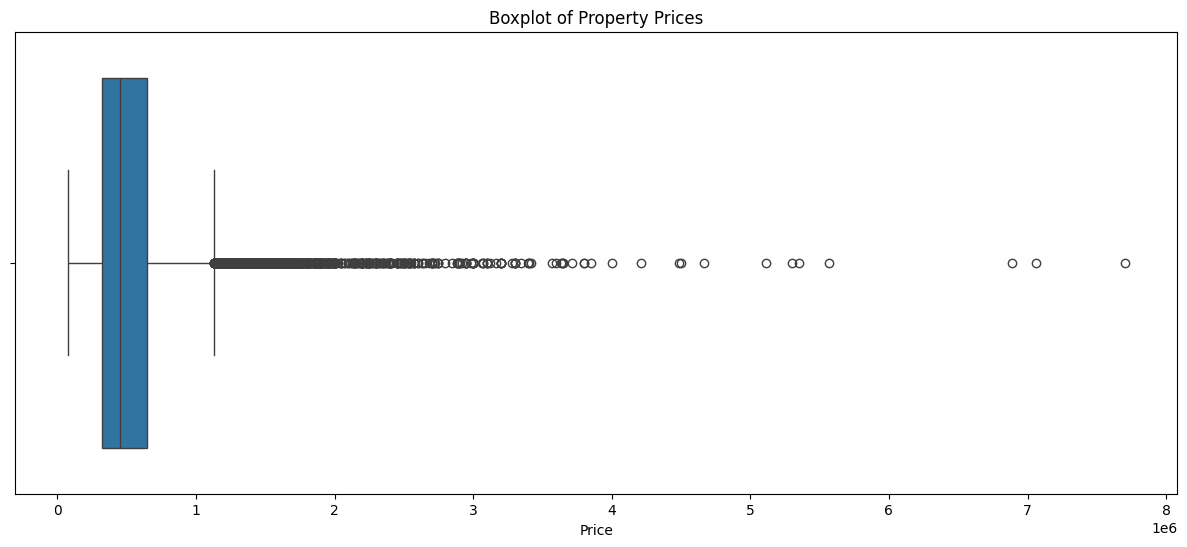

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Property Prices')
plt.xlabel('Price')
plt.show()


# Visualize outliers using scatter plots for selected features

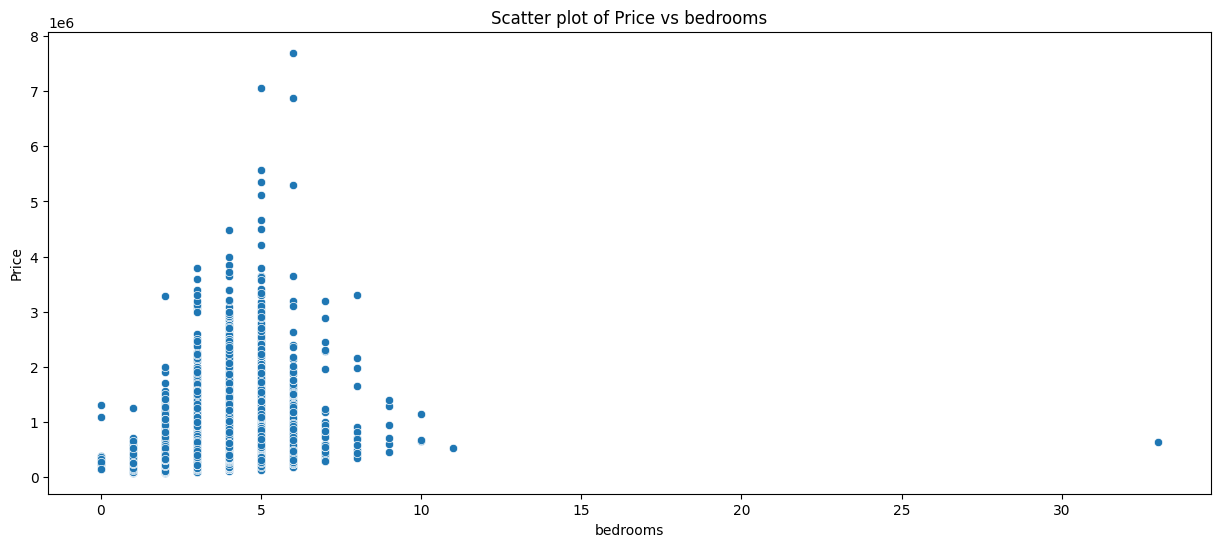

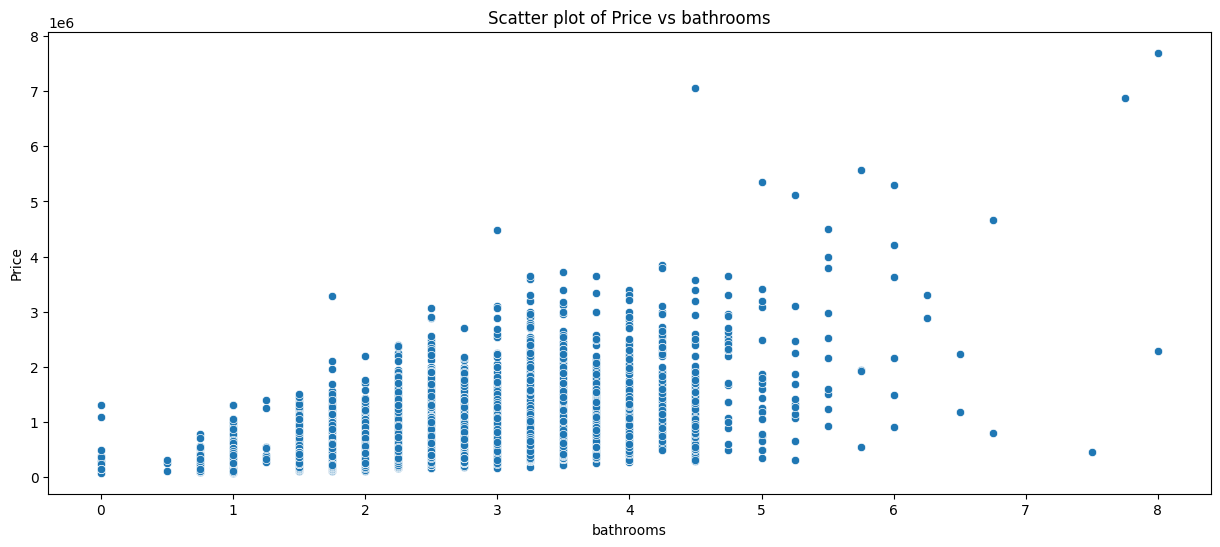

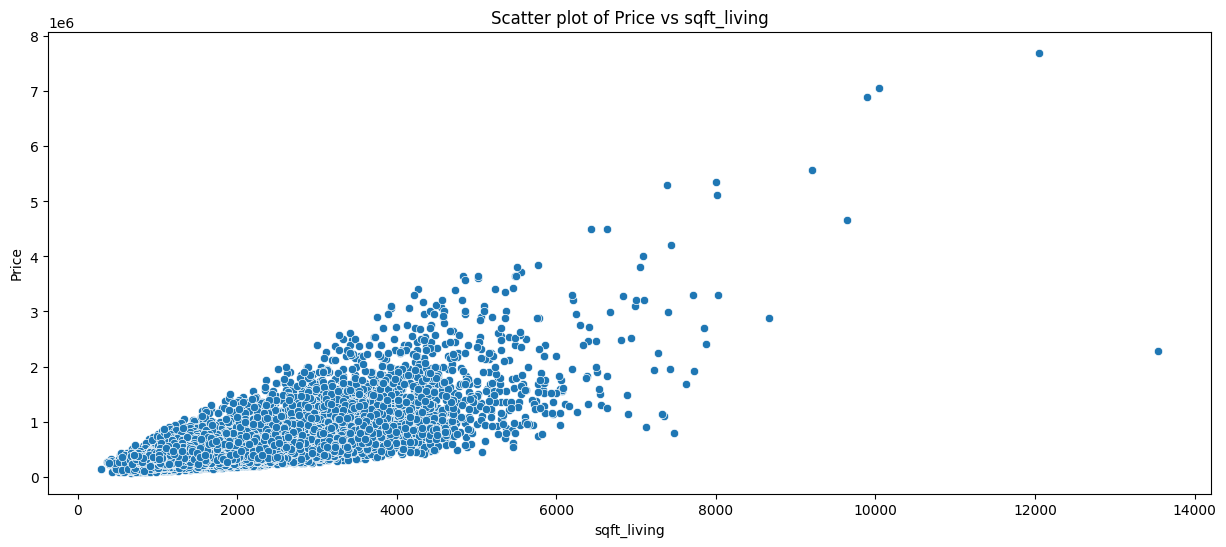

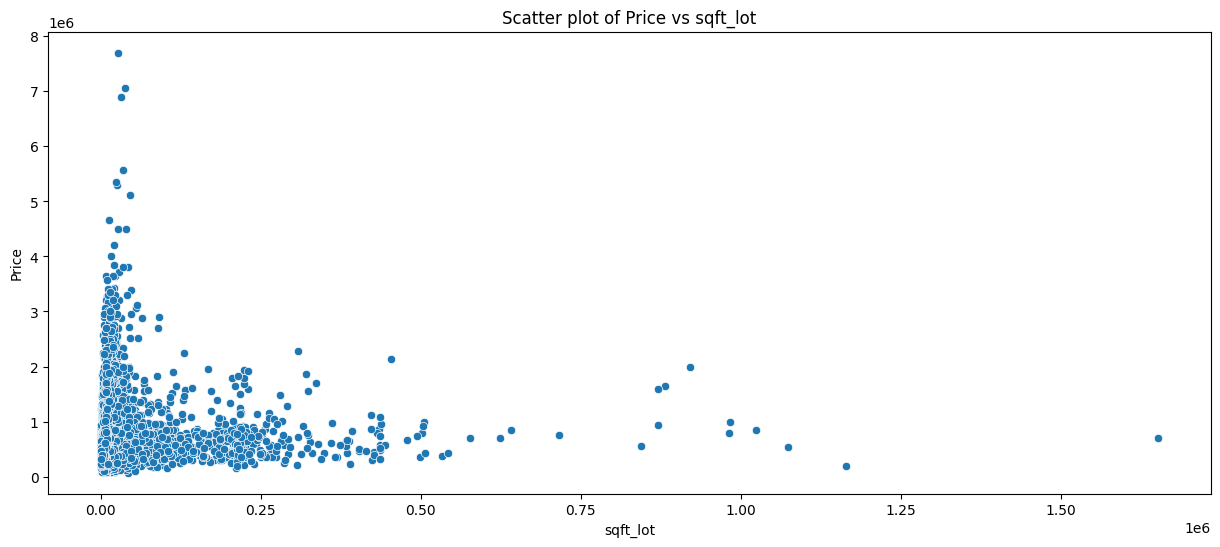

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

for feature in features:
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Scatter plot of Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

# Display the number of rows and columns

In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 21613
Number of columns: 21


# Outlier removal using IQR method for 'price' column

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Feature scaling using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Drop non-numeric columns for scaling
numeric_df = df.drop(columns=non_numeric_cols)

# Standardize numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

# Create a DataFrame from scaled features
df_scaled = pd.DataFrame(scaled_features, columns=numeric_df.columns)

# Concatenate non-numeric columns with scaled numeric features
for col in non_numeric_cols:
    df_scaled[col] = df[col].values

# Display the first few rows of the scaled DataFrame
print(df_scaled.head())


         id     price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0  0.912687 -1.179105 -1.456558  -1.477242    -1.026772 -0.223404 -0.886437   
1  0.629365  0.292827 -0.361156   0.278650     0.767205 -0.183712  0.975690   
2  0.357374 -1.425307 -1.456558  -1.477242    -1.555931 -0.114948 -0.886437   
3 -0.735422  0.609577  0.734246   1.332186    -0.020080 -0.239610 -0.886437   
4 -0.920596  0.158447 -0.361156  -0.072528    -0.381457 -0.162818 -0.886437   

   waterfront      view  condition     grade  sqft_above  sqft_basement  \
0   -0.054675 -0.269401  -0.627864 -0.510564   -0.726449      -0.653333   
1   -0.054675 -0.269401  -0.627864 -0.510564    0.634790       0.324611   
2   -0.054675 -0.269401  -0.627864 -1.472874   -1.290195      -0.653333   
3   -0.054675 -0.269401   2.462312 -0.510564   -0.905198       1.571488   
4   -0.054675 -0.269401  -0.627864  0.451745   -0.038955      -0.653333   

   yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \


# Data overview after preprocessing

In [ ]:
print("\nData overview after preprocessing:")
print(df_scaled.info())
print(df_scaled.describe())


Data overview after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20467 non-null  float64
 1   price          20467 non-null  float64
 2   bedrooms       20467 non-null  float64
 3   bathrooms      20467 non-null  float64
 4   sqft_living    20467 non-null  float64
 5   sqft_lot       20467 non-null  float64
 6   floors         20467 non-null  float64
 7   waterfront     20467 non-null  float64
 8   view           20467 non-null  float64
 9   condition      20467 non-null  float64
 10  grade          20467 non-null  float64
 11  sqft_above     20467 non-null  float64
 12  sqft_basement  20467 non-null  float64
 13  yr_built       20467 non-null  float64
 14  yr_renovated   20467 non-null  float64
 15  zipcode        20467 non-null  float64
 16  lat            20467 non-null  float64
 17  long          


# Visualize data distributions

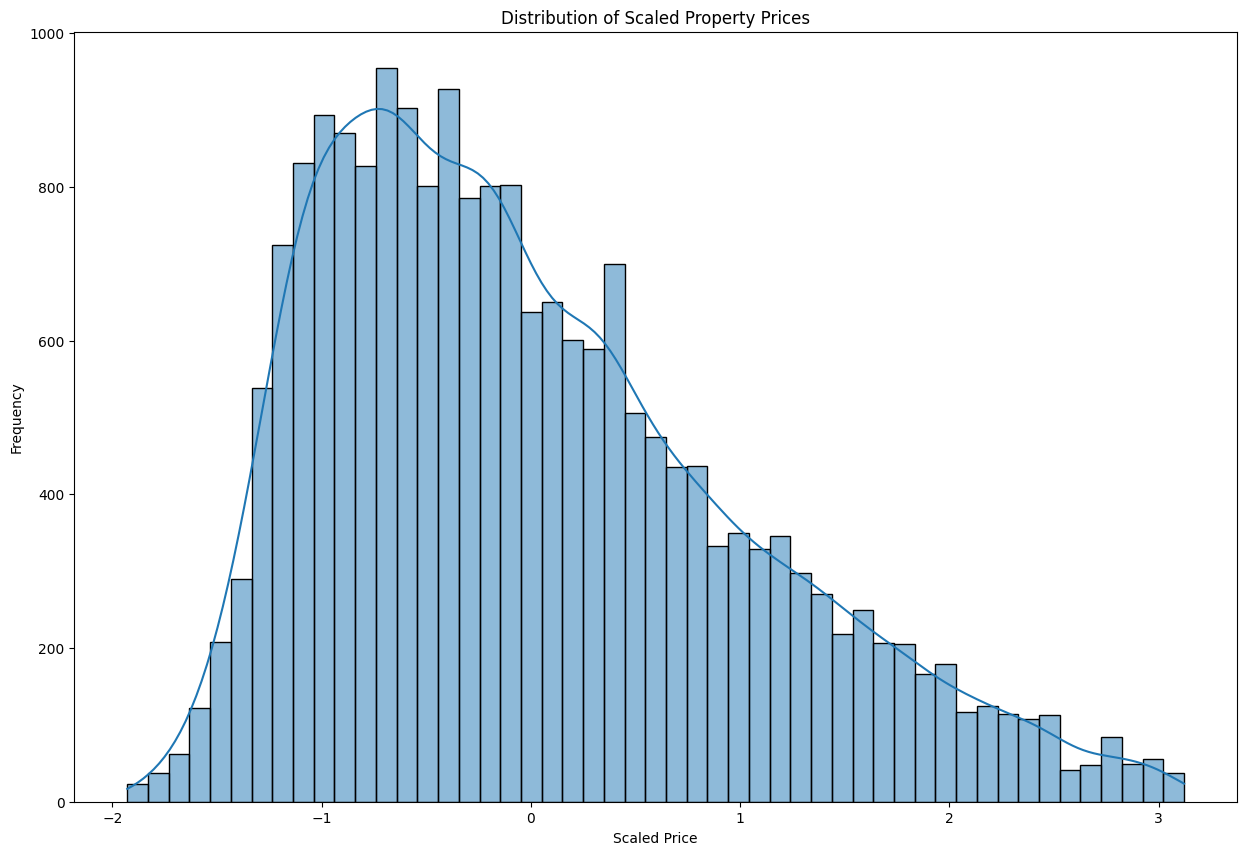

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(df_scaled['price'], kde=True)
plt.title('Distribution of Scaled Property Prices')
plt.xlabel('Scaled Price')
plt.ylabel('Frequency')
plt.show()

# Convert date to datetime format if needed

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from date

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Average price trends over years

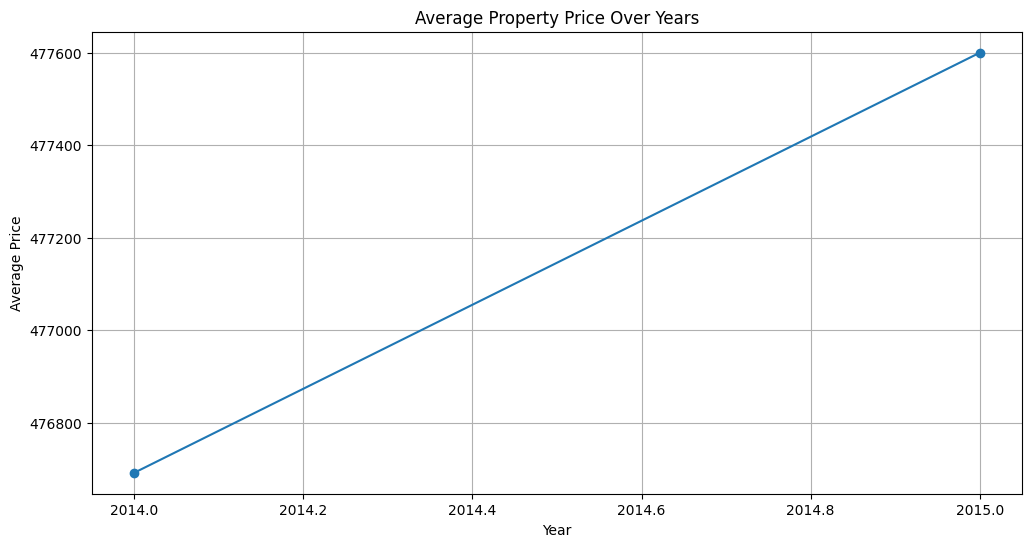

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('year')['price'].mean().plot(marker='o')
plt.title('Average Property Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Average price trends over months

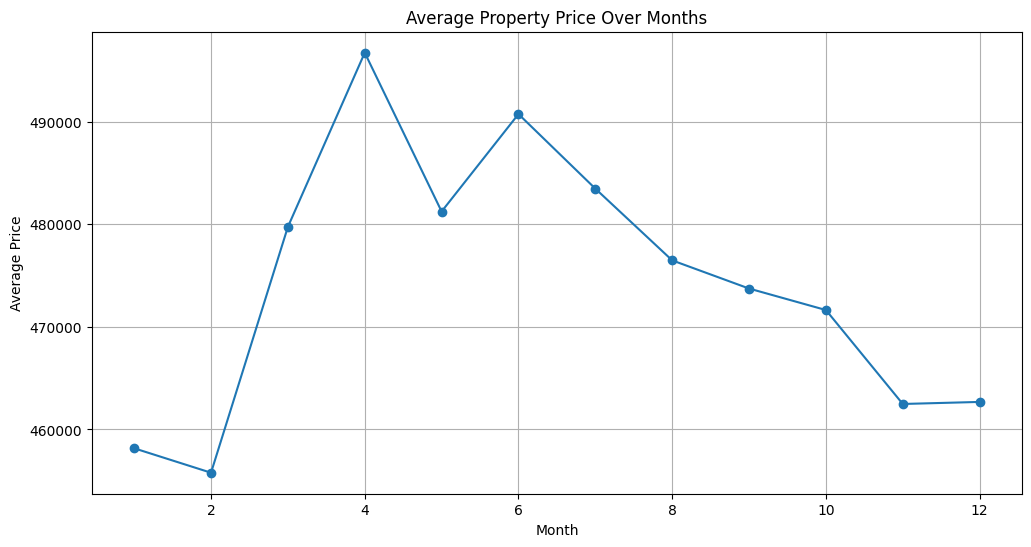

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('month')['price'].mean().plot(marker='o')
plt.title('Average Property Price Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

 # Feature Engineering
 ## Calculate price per square foot

In [ ]:

df['price_per_sqft'] = df['price'] / df['sqft_living']
print(df[['price', 'sqft_living', 'price_per_sqft']].head())

      price  sqft_living  price_per_sqft
0  231300.0         1180      196.016949
1  538000.0         2570      209.338521
2  180000.0          770      233.766234
3  604000.0         1960      308.163265
4  510000.0         1680      303.571429


# Calculate property age

In [ ]:
current_year = pd.Timestamp.now().year
df['property_age'] = current_year - df['yr_built']
print(df[['yr_built', 'property_age']].head())

   yr_built  property_age
0      1955            69
1      1951            73
2      1933            91
3      1965            59
4      1987            37


# Assuming 'lat' is available

In [ ]:
df['lat'] = df['lat'].astype(float)

# Select relevant features

In [ ]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'price_per_sqft', 'property_age', 'lat']

# Create a new DataFrame with selected features
df_selected = df[selected_features + ['price']]

# Display the first few rows of the new DataFrame
print(df_selected.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  price_per_sqft  property_age  \
0         2       1.00         1180      5650      196.016949            69   
1         3       2.25         2570      7242      209.338521            73   
2         2       1.00          770     10000      233.766234            91   
3         4       3.00         1960      5000      308.163265            59   
4         3       2.00         1680      8080      303.571429            37   

       lat     price  
0  47.5112  231300.0  
1  47.7210  538000.0  
2  47.7379  180000.0  
3  47.5208  604000.0  
4  47.6168  510000.0  


# Data Splitting
## Define features (X) and target variable (y)

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'price_per_sqft', 'property_age', 'lat']
X = df[features]
y = df['price']

# Split the dataset into training, validation, and test sets
## We'll use an 80-10-10 split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets

In [ ]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (16373, 7), (16373,)
Validation set: (2047, 7), (2047,)
Test set: (2047, 7), (2047,)


# Model Selection
## 1. Linear Regression

    

In [ ]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_lr = lr_model.predict(X_val)

# Evaluate the model
mse_lr = mean_squared_error(y_val, y_val_pred_lr)
r2_lr = r2_score(y_val, y_val_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2 Score: {r2_lr}")

Linear Regression - MSE: 4350202201.704783, R2 Score: 0.8964226827063176


# 3. Decision Tree

In [ ]:
# Initialize Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate the model
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"Decision Tree Regression - MSE: {mse_dt}, R2 Score: {r2_dt}")

Decision Tree Regression - MSE: 108686613.69320957, R2 Score: 0.9974121966404996


#2. Random Forest Regression

In [ ]:
# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the model
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

print(f"Random Forest Regression - MSE: {mse_rf}, R2 Score: {r2_rf}")

Random Forest Regression - MSE: 24149488.178716462, R2 Score: 0.9994250062218748


# Model Evaluation

In [ ]:
# Create a dictionary to store the evaluation metrics
evaluation_metrics = {}

# Linear Regression
evaluation_metrics['Linear Regression'] = {'MSE': mse_lr, 'R2 Score': r2_lr}

# Decision Tree Regression
evaluation_metrics['Decision Tree Regression'] = {'MSE': mse_dt, 'R2 Score': r2_dt}

# Random Forest Regression
evaluation_metrics['Random Forest Regression'] = {'MSE': mse_rf, 'R2 Score': r2_rf}

# Convert the dictionary to a DataFrame for better visualization
import pandas as pd

df_evaluation = pd.DataFrame(evaluation_metrics).T
print(df_evaluation)


                                   MSE  R2 Score
Linear Regression         4.350202e+09  0.896423
Decision Tree Regression  1.086866e+08  0.997412
Random Forest Regression  2.414949e+07  0.999425


Interpretation:

    Linear Regression: The model has a relatively high MSE and an R2 Score of approximately 0.90, indicating that about 90% of the variance in the target variable (property prices) is explained by the model. However, the MSE is quite high, suggesting that the predictions have larger errors compared to the other models.

    Decision Tree Regression: The model has a significantly lower MSE and a very high R2 Score close to 1, indicating that it explains about 99.74% of the variance in the target variable. The Decision Tree model performs exceptionally well on the validation set compared to Linear Regression.

    Random Forest Regression: The model has an extremely low MSE and an R2 Score very close to 1, suggesting an excellent fit to the data. The Random Forest model performs the best among the evaluated models, with the lowest MSE and highest R2 Score, indicating high predictive accuracy and goodness-of-fit.

#Conclusion:

    Random Forest Regression appears to be the best-performing model based on the evaluation metrics provided. It demonstrates the lowest MSE and highest R2 Score, suggesting superior predictive accuracy and model fit.

    Decision Tree Regression also performs exceptionally well, with a very low MSE and high R2 Score, indicating excellent performance on the validation set.

    Linear Regression, although not as strong as the other models based on the MSE and R2 Score, still provides a decent performance in predicting property prices.